In [1]:
import netCDF4
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
import matplotlib.colors as colors
from scipy.io import loadmat
from os import listdir
from os.path import isfile, join

In [2]:
PATH = '/home/straydog/Documents/senior_design/netCDF_files/20191016/'

In [20]:
filearr = [f for f in listdir(PATH) if isfile(join(PATH, f))]
filearr

['cfrad.20191016_201933.472_to_20191016_202448.288_col-radar_REL_PFAR360_SUR.nc']

In [21]:
cmap_arr = loadmat('/home/straydog/Documents/senior_design/python_scripts/nws.mat')['nwsZ']
clrs = colors.ListedColormap(cmap_arr, 'reflectivity')
fh = Dataset('/home/straydog/Documents/senior_design/netCDF_files/20191016/cfrad.20191016_201933.472_to_20191016_202448.288_col-radar_REL_PFAR360_SUR.nc')
fh

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    Sub_conventions: CF-Radial instrument_parameters radar_parameters radar_calibration
    version: CF-Radial-1.3
    title: ALLPRODS
    institution: 
    references: Conversion software: Radx::SigmetRadxFile
    source: Sigmet IRIS software
    history: Sigmet RAW file: 
    comment: 
    original_format: SIGMETRAW
    driver: RadxConvert(NCAR)
    created: 2019/10/28 21:35:41.370
    start_datetime: 2019-10-16T20:19:33Z
    time_coverage_start: 2019-10-16T20:19:33Z
    start_time: 2019-10-16 20:19:33.472
    end_datetime: 2019-10-16T20:24:48Z
    time_coverage_end: 2019-10-16T20:24:48Z
    end_time: 2019-10-16 20:24:48.288
    instrument_name: col-radar
    site_name: col-radar
    scan_name: REL_PFAR360
    scan_id: 0
    platform_is_mobile: false
    n_gates_vary: true
    ray_times_increase: true
    dimensions(sizes): time(5760), range(993), n_points(4850280), sweep(16)

In [5]:
dim = fh.dimensions
var = fh.variables

In [19]:
#var['elevation']
var['antenna_transition']

<class 'netCDF4._netCDF4.Variable'>
int8 antenna_transition(time)
    long_name: antenna_is_in_transition_between_sweeps
    units: 
    _FillValue: -128
    comment: 1 if antenna is in transition, 0 otherwise
unlimited dimensions: 
current shape = (246,)
filling on

In [7]:
matplotlib inline

(-1, 1)

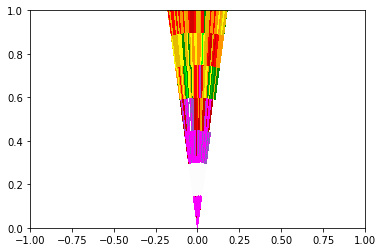

In [16]:
rgate = var['range'][1]-var['range'][0]
ndX = rgate*np.arange(len(var['range']))/1000
ndY = var['azimuth']

ndY = np.reshape(ndY,(len(var['azimuth']),1))*(np.pi/180)
nX = ndX*np.cos(ndY)
nY = ndX*np.sin(ndY)
rflct = var['SNR']
plt.pcolormesh(nY, nX, rflct, vmin = -20, vmax = 64, cmap = clrs)
plt.ylim(0,1)
plt.xlim(-1,1)